In [1]:
import pandas as pd
import os
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt

# LESSON 2
In this lesson we show the EDA
The data consist of contents added to Netflix from 2008 to 2021.

#### Read data and define constant

In [2]:
df_netflix = pd.read_csv('../data/netflix1.csv')
id_experiment = datetime.strftime(datetime.now(), '%y_%m_%d_%H-%M-%S')
EXPERIMENT_FOLDER = f'../output/{id_experiment}'
os.makedirs(EXPERIMENT_FOLDER, exist_ok=True)

COLUMN_NAMES = list(df_netflix.columns)
df_netflix.head()

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"


In [3]:
df_netflix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8790 entries, 0 to 8789
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8790 non-null   object
 1   type          8790 non-null   object
 2   title         8790 non-null   object
 3   director      8790 non-null   object
 4   country       8790 non-null   object
 5   date_added    8790 non-null   object
 6   release_year  8790 non-null   int64 
 7   rating        8790 non-null   object
 8   duration      8790 non-null   object
 9   listed_in     8790 non-null   object
dtypes: int64(1), object(9)
memory usage: 686.8+ KB


In [4]:
df_netflix.shape

(8790, 10)

#### Distribution variables

In [5]:
for col in df_netflix.columns:
    print(f'{col}: {df_netflix[col].nunique()}')

show_id: 8790
type: 2
title: 8787
director: 4528
country: 86
date_added: 1713
release_year: 74
rating: 14
duration: 220
listed_in: 513


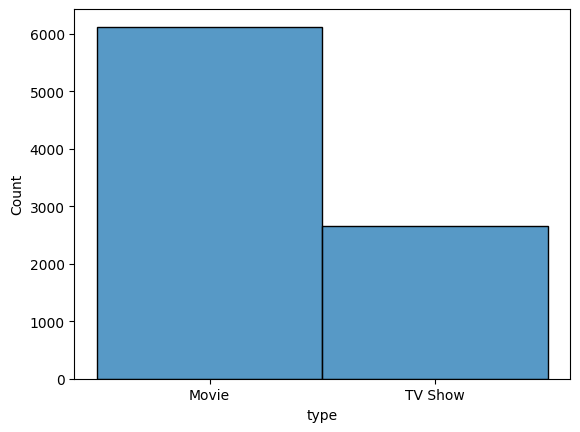

In [6]:
os.makedirs(f'{EXPERIMENT_FOLDER}/distr', exist_ok=True)
fig = plt.figure()
sns.histplot(df_netflix['type'])
fig.savefig(f'{EXPERIMENT_FOLDER}/distr/type_hist.png')
#fig.clf()

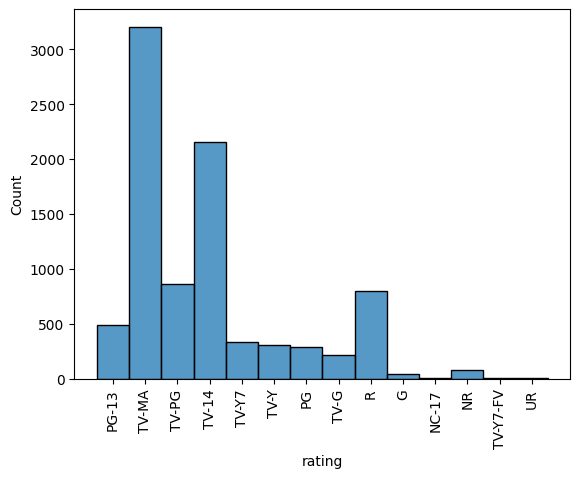

In [7]:
fig = plt.figure()
sns.histplot(df_netflix['rating'])
plt.xticks(rotation=90)
fig.savefig(f'{EXPERIMENT_FOLDER}/distr/rating_hist.png')

In [30]:
df_netflix[['director', 'type']].value_counts().head(10)

director                type   
Not Given               TV Show    2415
                        Movie       173
Rajiv Chilaka           Movie        19
Raúl Campos, Jan Suter  Movie        18
Suhas Kadav             Movie        16
Marcus Raboy            Movie        15
Alastair Fothergill     TV Show      14
Jay Karas               Movie        14
Cathy Garcia-Molina     Movie        13
Youssef Chahine         Movie        12
Name: count, dtype: int64

<Axes: xlabel='country'>

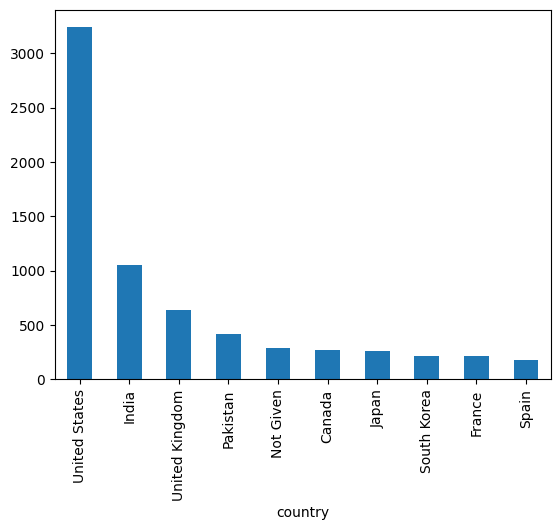

In [35]:
df_netflix['country'].value_counts().head(10).plot(kind='bar')

# dividi film and movies metti a confronto con barplot  

#### Analisi delle durate dei film
Quanto dura un film, e quanto dura un movies? 

<Axes: xlabel='duration', ylabel='Count'>

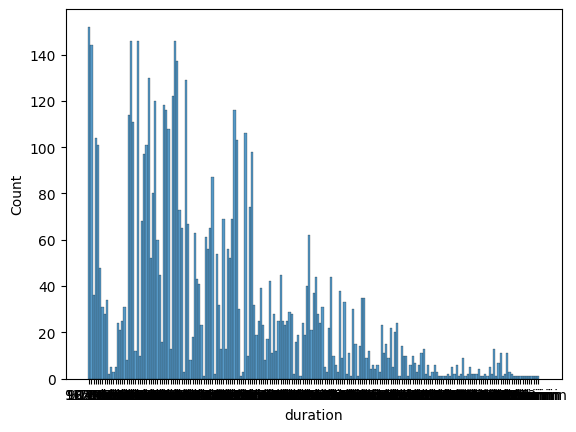

In [48]:

bins = [0,  330]
sns.histplot(data = df_netflix[df_netflix['type']=='Movie'], x='duration', bins=10)

#### Com'è la distribuzione dei rilasci del film? 
- in quale mese vengono rilasciati più film?
- in quale anno più film? 
- Come è stata la crescita dei film rilasciati negli anni? 
- Dopo ogni quanto viene rilasciato un film? 

#### Com'è la distribuzione del rating dei film? 
- qual'è il rating più frequente?
- qual'è il rating per anno?
- sia per movie che per film?

In [81]:
import plotly.express as px
df = df_netflix['rating'].value_counts()
px.pie(df, names=df.index,values=df.values, hole=.5)